In [107]:
import urbanpy as up
import geopandas as gpd
import pandas as pd
import osmnx as ox
from pyproj import CRS
import shapely

In [2]:
df = pd.read_csv("markets.csv")
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.lon, df.lat), crs=4326)

In [3]:
gdf

nombre                     geometry        lat        lon
0   Ocoña  POINT (-76.86118 -12.22703) -12.227025 -76.861183
1  Qatuna  POINT (-77.04573 -11.89037) -11.890373 -77.045735

In [119]:
gdf['lat'][1]

-11.8906001

In [118]:

gdf['lat'][1] = -11.8906001
gdf['lon'][1] = -77.041684

gdf['geometry'][1] = shapely.geometry.Point(-77.041684, -11.8906001)


/var/folders/kb/8rst2bm96jq7g3ykfrtw15zc0000gp/T/ipykernel_2602/2901266652.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf['lat'][1] = -11.8906001
/var/folders/kb/8rst2bm96jq7g3ykfrtw15zc0000gp/T/ipykernel_2602/2901266652.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf['lon'][1] = -77.041684


In [147]:
gdf = gdf.append([{'nombre': 'Parque Siglo XXI', 'geometry': shapely.geometry.Point(-77.04188674825429, -11.89508862342916),
            'lat': -11.89508862342916, 'lon':-77.04188674825429},
           {'nombre': 'Mercado de Universitaria y San felipe', 'geometry': shapely.geometry.Point(-77.03934130462973, -11.899391309611614),
            'lat': -11.899391309611614, 'lon':-77.03934130462973}] , ignore_index=True)

In [156]:
gdf.crs = 4326

In [4]:
pachacamac_boundaries = up.download.nominatim_osm('Pachacamac, Lima, Peru', expected_position=2)
pachacamac_boundaries.crs = 'EPSG:4326'

<AxesSubplot:>

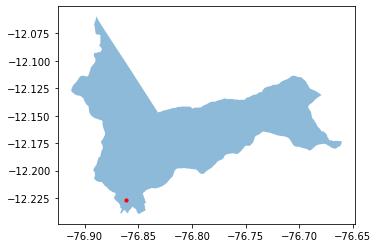

In [5]:
ax = pachacamac_boundaries.plot(alpha=0.5)
gdf.iloc[:1].plot(color='r', markersize=10, ax=ax)

In [6]:
pachacamac_graph = up.download.osmnx_graph(
    download_type='polygon', 
    network_type='walk', 
    geom=pachacamac_boundaries.geometry[2]
)

In [120]:
ocoña_isochrones = up.routing.isochrone_from_graph(
    graph=pachacamac_graph, 
    locations=[[gdf.geometry[0].x, gdf.geometry[0].y]], 
    time_range=[5, 10, 15], 
    profile='walking'
)

/Users/claudio/Documents/proyecto-foodhub-lima/.env/lib/python3.9/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)


In [22]:
pachacamac_graph_proj = ox.project_graph(pachacamac_graph)

In [23]:
# Get Edges and Nodes
nodes_proj, edges_proj = ox.graph_to_gdfs(pachacamac_graph_proj, nodes=True, edges=True)

In [26]:
selected_crs = CRS(edges_proj.crs).to_epsg()
selected_crs

32618

<AxesSubplot:>

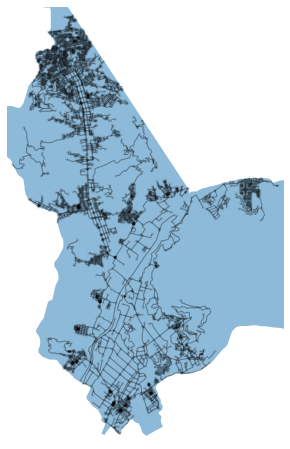

In [27]:
pachacamac_boundaries_proj = pachacamac_boundaries.to_crs(selected_crs)

fig, ax = ox.plot_graph(pachacamac_graph_proj, show=False, close=False, edge_color='k',
                        edge_alpha=0.2, node_size=10, bgcolor='none', node_color='k', node_alpha=0.1)
pachacamac_boundaries_proj.plot(ax=ax, alpha=0.5, zorder=-1)

(-1353581.3313558376, -1351175.9950465187)

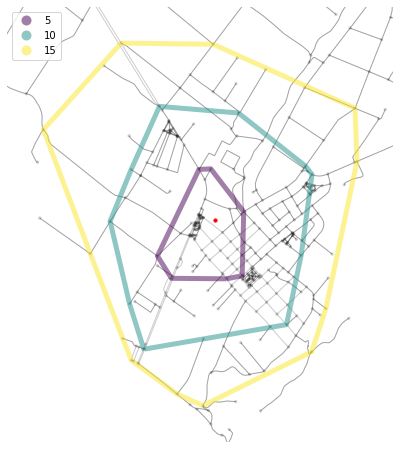

In [121]:
ocoña_proj = gdf.iloc[:1].to_crs(selected_crs)

fig, ax = ox.plot_graph(pachacamac_graph_proj, show=False, close=False, edge_color='k',
                        edge_alpha=0.2, node_size=10, bgcolor='none', node_color='k', node_alpha=0.2)
ocoña_isochrones.plot('contour', ax=ax, alpha=0.5, legend=True, categorical=True, cmap='viridis', 
                facecolor='none', linewidth=5, zorder=2)
ocoña_proj.plot(color='r', markersize=10, ax=ax, zorder=3)

pad = 200
minx, miny, maxx, maxy = ocoña_isochrones.total_bounds
ax.set_xlim(minx-pad, maxx+pad)
ax.set_ylim(miny-pad, maxy+pad)

## Carabayllo - Mercado Qatuna

In [109]:
carabayllo_boundaries = up.download.nominatim_osm('Carabayllo, Lima, Peru')
carabayllo_boundaries.crs = 'EPSG:4326'

In [ ]:
ax = carabayllo_boundaries.buffer(1).plot(alpha=0.5)
gdf.iloc[1:].plot(color='r', markersize=10, ax=ax)

In [200]:
carabayllo_graph = up.download.osmnx_graph(
    download_type='polygon', 
    network_type='walk', 
    geom=carabayllo_boundaries.geometry[0].buffer(0.005)
)

In [194]:
qatuna_isochrones = up.routing.isochrone_from_graph(
    graph=carabayllo_graph, 
    locations=gdf.iloc[1:][['lon', 'lat']].values, 
    time_range=[5, 10, 15], 
    profile='walking'
)

/Users/claudio/Documents/proyecto-foodhub-lima/.env/lib/python3.9/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/claudio/Documents/proyecto-foodhub-lima/.env/lib/python3.9/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/claudio/Documents/proyecto-foodhub-lima/.env/lib/python3.9/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)


In [195]:
carabayllo_graph_proj = ox.project_graph(carabayllo_graph)

In [196]:
# Get Edges and Nodes
nodes_proj, edges_proj = ox.graph_to_gdfs(carabayllo_graph_proj, nodes=True, edges=True)

In [197]:
selected_crs = CRS(edges_proj.crs).to_epsg()
selected_crs

32618

<AxesSubplot:>

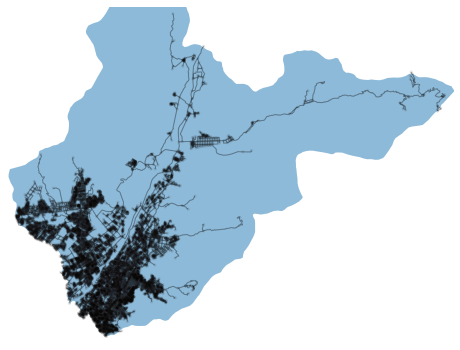

In [198]:
carabayllo_boundaries_proj = carabayllo_boundaries.to_crs(selected_crs)

fig, ax = ox.plot_graph(carabayllo_graph_proj, show=False, close=False, edge_color='k',
                        edge_alpha=0.2, node_size=10, bgcolor='none', node_color='k', node_alpha=0.1)
carabayllo_boundaries_proj.plot(ax=ax, alpha=0.5, zorder=-1)

(-1317199.4332401876, -1314158.572317332)

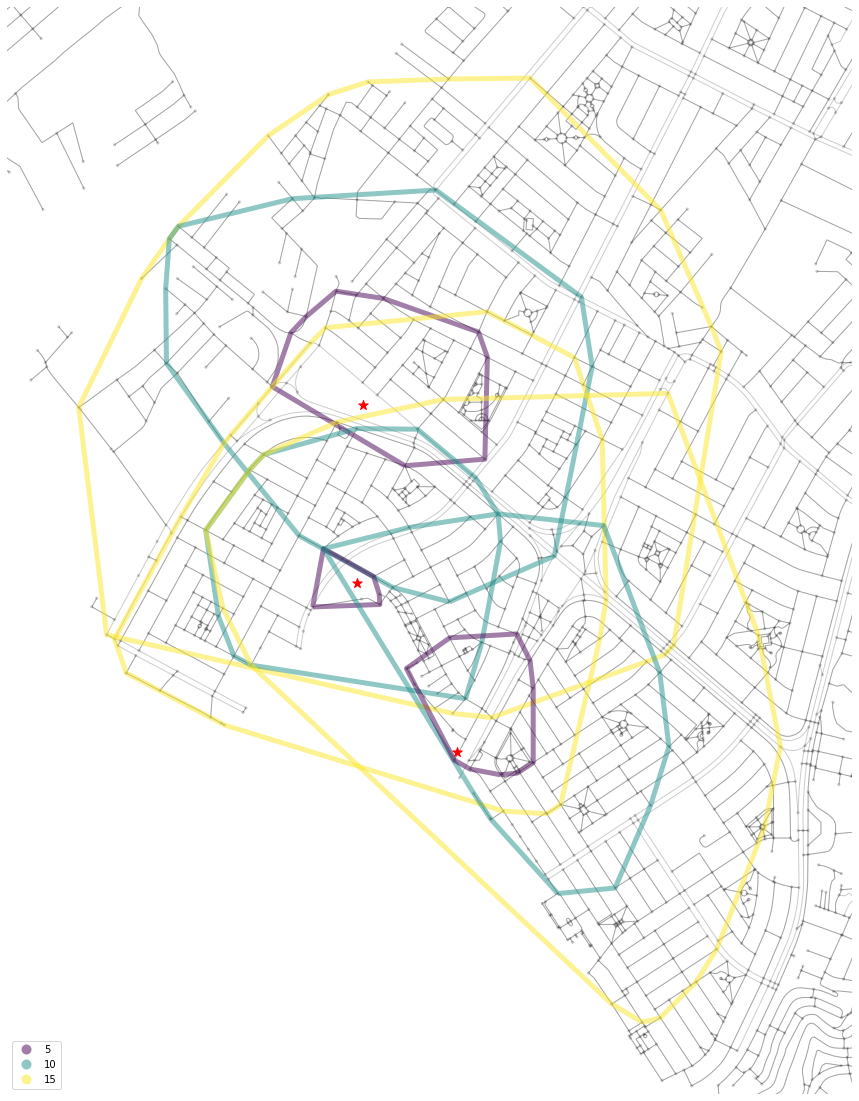

In [199]:
qatuna_proj = gdf.iloc[1:].to_crs(selected_crs)

fig, ax = ox.plot_graph(carabayllo_graph_proj, show=False, close=False, edge_color='k', figsize=(20,20),
                        edge_alpha=0.2, node_size=10, bgcolor='none', node_color='k', node_alpha=0.2)
qatuna_isochrones.plot('contour', ax=ax, alpha=0.5, legend=True, categorical=True, cmap='viridis', 
                facecolor='none', linewidth=5, zorder=2)
qatuna_proj.plot(color='r', markersize=100, marker='*', ax=ax, zorder=3)

pad = 200
minx, miny, maxx, maxy = qatuna_isochrones.total_bounds
ax.set_xlim(minx-pad, maxx+pad)
ax.set_ylim(miny-pad, maxy+pad)

## Make map for both areas

In [59]:
import matplotlib.pyplot as plt

(-1353581.3313558376, -1351175.9950465187)

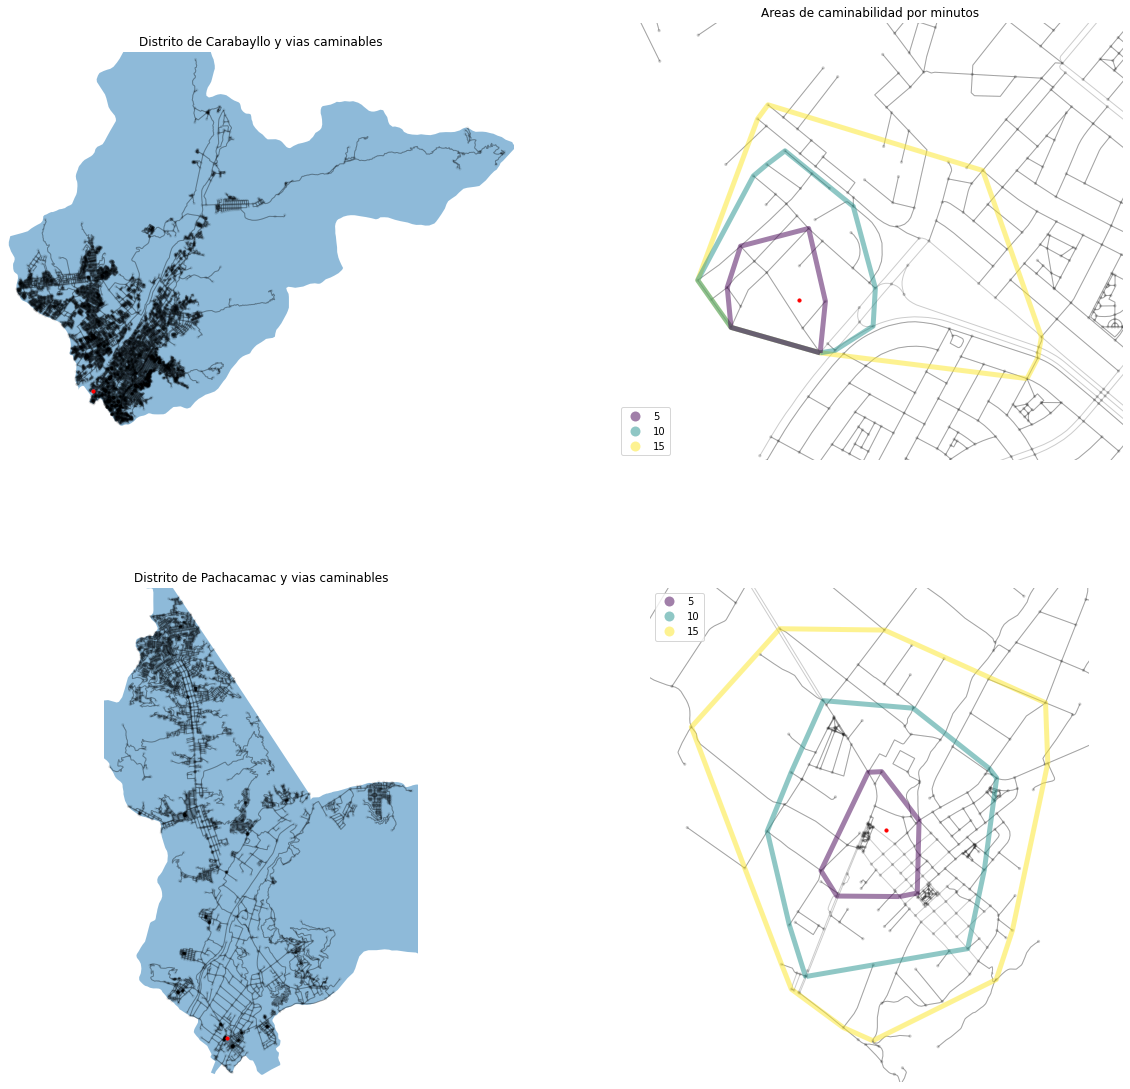

In [67]:
pad = 200

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20,20))

ax1.set_title('Distrito de Carabayllo y vias caminables')
ox.plot_graph(carabayllo_graph_proj, show=False, close=False, edge_color='k', ax=ax1,
              edge_alpha=0.2, node_size=10, bgcolor='none', node_color='k', node_alpha=0.1)
carabayllo_boundaries_proj.plot(ax=ax1, alpha=0.5, zorder=-1)
qatuna_proj.plot(color='r', markersize=10, ax=ax1, zorder=3)

ax2.set_title('Areas de caminabilidad por minutos')
ox.plot_graph(carabayllo_graph_proj, show=False, close=False, edge_color='k', ax=ax2,
              edge_alpha=0.2, node_size=10, bgcolor='none', node_color='k', node_alpha=0.2)
qatuna_isochrones.plot('contour', ax=ax2, alpha=0.5, legend=True, categorical=True, cmap='viridis', 
                facecolor='none', linewidth=5, zorder=2)
qatuna_proj.plot(color='r', markersize=10, ax=ax2, zorder=3)

minx, miny, maxx, maxy = isochrones.total_bounds
ax2.set_xlim(minx-pad, maxx+pad)
ax2.set_ylim(miny-pad, maxy+pad)

ax3.set_title('Distrito de Pachacamac y vias caminables')
ox.plot_graph(pachacamac_graph_proj, show=False, close=False, edge_color='k', ax=ax3,
              edge_alpha=0.2, node_size=10, bgcolor='none', node_color='k', node_alpha=0.1)
pachacamac_boundaries_proj.plot(ax=ax3, alpha=0.5, zorder=-1)
ocoña_proj.plot(color='r', markersize=10, ax=ax3, zorder=3)

ox.plot_graph(pachacamac_graph_proj, show=False, close=False, edge_color='k', ax=ax4,
              edge_alpha=0.2, node_size=10, bgcolor='none', node_color='k', node_alpha=0.2)
ocoña_isochrones.plot('contour', ax=ax4, alpha=0.5, legend=True, categorical=True, cmap='viridis', 
                facecolor='none', linewidth=5, zorder=2)
ocoña_proj.plot(color='r', markersize=10, ax=ax4, zorder=3)

minx, miny, maxx, maxy = ocoña_isochrones.total_bounds
ax4.set_xlim(minx-pad, maxx+pad)
ax4.set_ylim(miny-pad, maxy+pad)

In [85]:
qatuna_isochrones

group_index  contour                                           geometry
0            0       15  POLYGON ((277727.307 -1315442.834, 277221.410 ...
1            0       10  POLYGON ((277221.410 -1315379.787, 277003.595 ...
2            0        5  POLYGON ((277221.410 -1315379.787, 277003.595 ...

In [127]:
edges_filter = gpd.clip(edges_proj, qatuna_isochrones.iloc[2].geometry)

In [96]:
manzanas_carabayllo = gpd.clip(manzanas_lima, carabayllo_boundaries) 

In [101]:
import contextily as cx

In [131]:
carabayllo_boundaries.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [163]:
carabayllo_boundaries_proj.crs

<Projected CRS: EPSG:32618>
Name: WGS 84 / UTM zone 18N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 78°W and 72°W, northern hemisphere between equator and 84°N, onshore and offshore. Bahamas. Canada - Nunavut; Ontario; Quebec. Colombia. Cuba. Ecuador. Greenland. Haiti. Jamica. Panama. Turks and Caicos Islands. United States (USA). Venezuela.
- bounds: (-78.0, 0.0, -72.0, 84.0)
Coordinate Operation:
- name: UTM zone 18N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

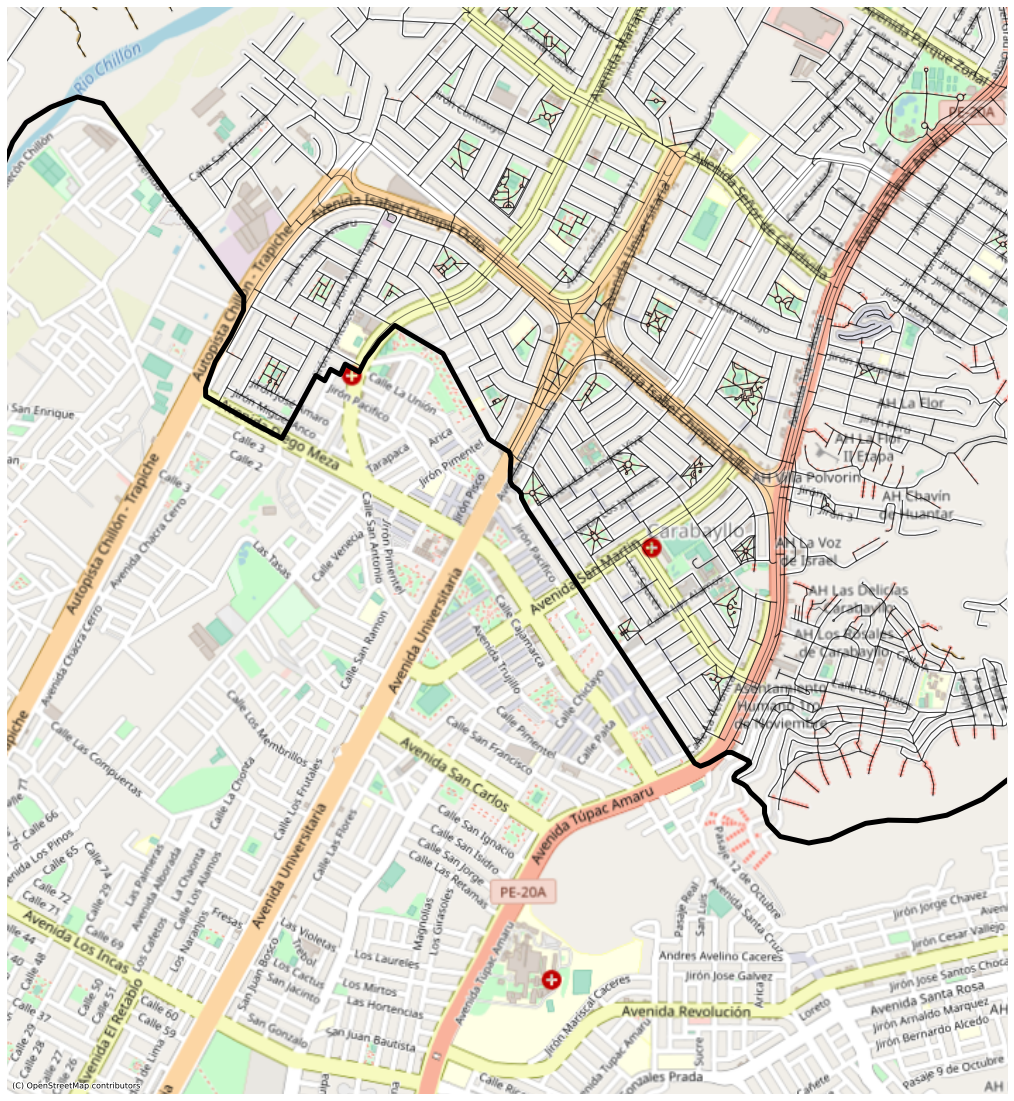

In [168]:
fig, ax = ox.plot_graph(carabayllo_graph_proj, show=False, close=False, edge_color='k', figsize=(20,20),
                        edge_alpha=0.5, node_size=10, bgcolor='none', node_color='k', node_alpha=0.1)
carabayllo_boundaries_proj.plot(ax=ax, facecolor='none', linewidth=5, zorder=1)

pad = 700
minx, miny, maxx, maxy = qatuna_isochrones.iloc[2:].total_bounds
ax.set_xlim(minx-pad, maxx+pad)
ax.set_ylim(miny-pad-500, maxy+200)

cx.add_basemap(ax, crs=selected_crs, source=cx.providers.OpenStreetMap.Mapnik)

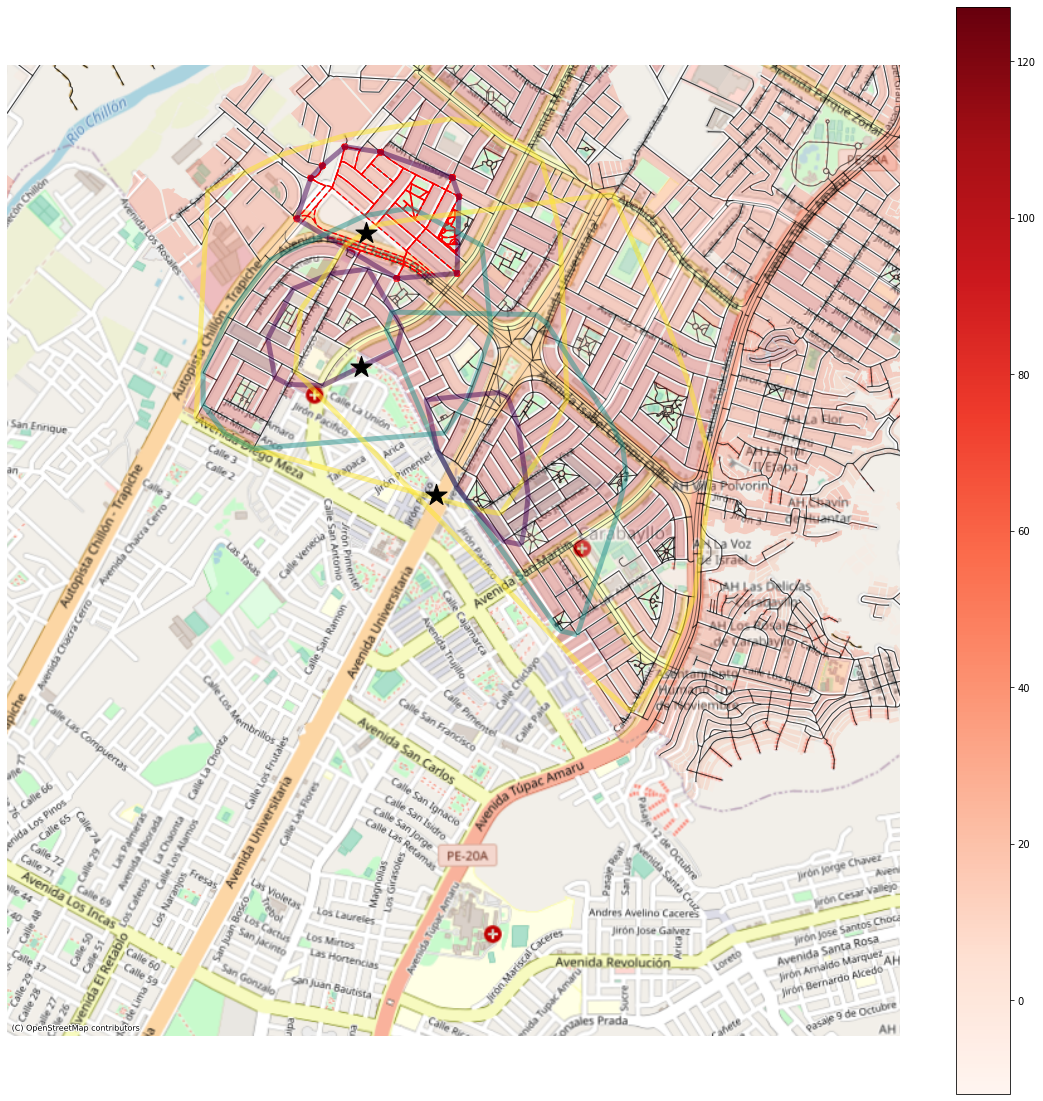

In [162]:
qatuna_proj = gdf.iloc[1:].to_crs(selected_crs)
manzanas_carabayllo_proj = manzanas_carabayllo.to_crs(selected_crs)

fig, ax = ox.plot_graph(carabayllo_graph_proj, show=False, close=False, edge_color='k', figsize=(20,20),
                        edge_alpha=0.5, node_size=10, bgcolor='none', node_color='k', node_alpha=0.1)
edges_filter.plot(alpha=1, color='r', linestyle='--', ax=ax)
manzanas_carabayllo_proj.plot('POB16', cmap='Reds', alpha=0.25, edgecolor='none', legend=True, ax=ax)
qatuna_isochrones.iloc[2:].plot('contour', ax=ax, alpha=0.5, categorical=True, cmap='viridis', 
                facecolor='none', linewidth=5, zorder=2)

qatuna_proj.plot(color='k', markersize=500, marker='*', ax=ax, zorder=3)

carabayllo_boundaries_proj.plot(ax=ax1, alpha=1, linewidth=20, zorder=4)

pad = 700
minx, miny, maxx, maxy = qatuna_isochrones.iloc[2:].total_bounds
ax.set_xlim(minx-pad, maxx+pad)
ax.set_ylim(miny-pad-500, maxy+200)

cx.add_basemap(ax, crs=selected_crs, source=cx.providers.OpenStreetMap.Mapnik)

In [74]:
qatuna_proj = gdf.iloc[1:].to_crs(selected_crs)
manzanas_carabayllo_proj = manzanas_carabayllo.to_crs(selected_crs)

fig, ax = ox.plot_graph(carabayllo_graph_proj, show=False, close=False, edge_color='k', figsize=(20,20),
                        edge_alpha=0.5, node_size=10, bgcolor='none', node_color='k', node_alpha=0.1)
edges_filter.plot(alpha=1, color='r', linestyle='--', ax=ax)
manzanas_carabayllo_proj.plot('POB16', cmap='Reds', alpha=0.25, edgecolor='none', legend=True, ax=ax)
qatuna_isochrones.iloc[2:].plot('contour', ax=ax, alpha=0.5, categorical=True, cmap='viridis', 
                facecolor='none', linewidth=5, zorder=2)
qatuna_proj.plot(color='k', markersize=500, marker='*', ax=ax, zorder=3)

pad = 700
minx, miny, maxx, maxy = qatuna_isochrones.iloc[2:].total_bounds
ax.set_xlim(minx-pad, maxx+pad)
ax.set_ylim(miny-pad, maxy+pad)

cx.add_basemap(ax, source=cx.providers.OpenStreetMap.Mapnik)

osmid  oneway lanes  \
u          v          key                                                       
599281346  4334542285 0                               333849426    True     3   
4334542285 4334542286 0                               435546417   False   NaN   
           1814997477 0                               436468187    True     2   
599281347  1156771011 0                                46960415    True     2   
           7006508803 0                               291410453    True     2   
...                                                         ...     ...   ...   
9258397901 9258397908 0                              1003267040   False   NaN   
9258397910 9258397901 0                              1003267040   False   NaN   
                      1    [1003267036, 1003267037, 1003267039]   False   NaN   
           9258397904 0                              1003267038   False   NaN   
9258397904 9258397910 0                              1003267038   False   NaN   

                              ref                         name      highway  \
u          v          key                                                     
599281346  4334542285 0    PE-20A          Avenida Túpac Amaru        trunk   
4334542285 4334542286 0       NaN                          NaN  residential   
           1814997477 0    PE-20A          Avenida Túpac Amaru        trunk   
599281347  1156771011 0       NaN                          NaN      primary   
           7006508803 0       NaN  Avenida Isabel Chimpu Ocllo      primary   
...                           ...                          ...          ...   
9258397901 9258397908 0       NaN                          NaN  residential   
9258397910 9258397901 0       NaN                          NaN  residential   
                      1       NaN                          NaN  residential   
           9258397904 0       NaN                          NaN  residential   
9258397904 9258397910 0       NaN                          NaN  residential   

                          maxspeed   length  \
u          v          key                     
599281346  4334542285 0         60   49.916   
4334542285 4334542286 0        NaN   13.829   
           1814997477 0         60   26.354   
599281347  1156771011 0        NaN   74.007   
           7006508803 0        NaN  108.526   
...                            ...      ...   
9258397901 9258397908 0        NaN   43.326   
9258397910 9258397901 0        NaN  123.153   
                      1        NaN  201.088   
           9258397904 0        NaN   50.086   
9258397904 9258397910 0        NaN   50.086   

                                                                    geometry  \
u          v          key                                                      
599281346  4334542285 0    LINESTRING (278826.839 -1316413.443, 278827.48...   
4334542285 4334542286 0    LINESTRING (278827.486 -1316463.108, 278841.33...   
           1814997477 0    LINESTRING (278827.486 -1316463.108, 278827.92...   
599281347  1156771011 0    LINESTRING (278777.664 -1316228.867, 278789.25...   
           7006508803 0    LINESTRING (278777.664 -1316228.867, 278786.50...   
...                                                                      ...   
9258397901 9258397908 0    LINESTRING (285028.106 -1301859.299, 285025.51...   
9258397910 9258397901 0    LINESTRING (285041.172 -1301981.146, 285028.10...   
                      1    LINESTRING (285041.172 -1301981.146, 285073.91...   
           9258397904 0    LINESTRING (285041.172 -1301981.146, 285035.05...   
9258397904 9258397910 0    LINESTRING (285024.815 -1302025.429, 285024.97...   

                          access junction service bridge  
u          v          key                                 
599281346  4334542285 0      NaN      NaN     NaN    NaN  
4334542285 4334542286 0      NaN      NaN     NaN    NaN  
           1814997477 0      NaN      NaN     NaN    NaN  
599281347  1156771011 0     

## Calculate population and sample

In [68]:
manzanas_lima = gpd.read_file('/Users/claudio/Documents/prep-covid-19/inputs/Manzanas/')

In [69]:
manzanas_lima.shape

(106889, 16)

In [70]:
manzanas_lima.head()

IDMANZANA CODZONA CODMZNA  CLASIFICAC  UBIGEO NOMBREMZNA  \
0    150728    None    None           1  150728       None   
1    150728    None    None           1  150728       None   
2    150728    None    None           1  150728       None   
3    150728    None    None           1  150728       None   
4    150728    None    None           1  150728       None   

                          URBANIZACI NSE07  POB07  VIV07 NSE16  POB16  VIV  \
0                               None  None      0      0  None      0    0   
1  ASOC PUEBLO NUEVO DE BUENOS AIRES  None      0      0  None      0    0   
2  ASOC PUEBLO NUEVO DE BUENOS AIRES  None      0      0  None      0    0   
3  ASOC PUEBLO NUEVO DE BUENOS AIRES  None      0      0  None      0    0   
4  ASOC PUEBLO NUEVO DE BUENOS AIRES  None      0      0  None      0    0   

   LONGITUDE   LATITUDE                                           geometry  
0 -76.671052 -11.916842  POLYGON ((-76.67379 -11.91608, -76.67329 -11.9...  
1 -76.672482 -11.914053  POLYGON ((-76.67319 -11.91445, -76.67318 -11.9...  
2 -76.673467 -11.914446  POLYGON ((-76.67368 -11.91441, -76.67341 -11.9...  
3 -76.673106 -11.914645  POLYGON ((-76.67351 -11.91473, -76.67321 -11.9...  
4 -76.672936 -11.914838  POLYGON ((-76.67335 -11.91492, -76.67267 -11.9...

<AxesSubplot:>

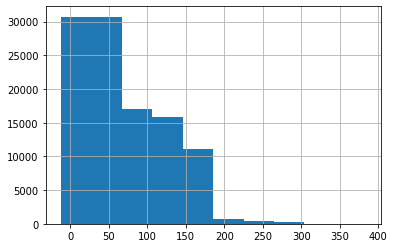

In [72]:
manzanas_lima['POB16'].hist()

<AxesSubplot:>

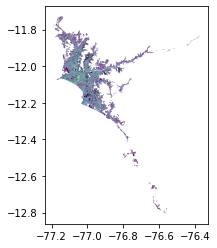

In [73]:
manzanas_lima.plot('POB16')

In [ ]:
gpd.clip()

In [ ]:
qatuna_isochrones

In [ ]:
ocoña_isochrones

In [172]:

polygon = gpd.read_file('map.geojson')

<AxesSubplot:>

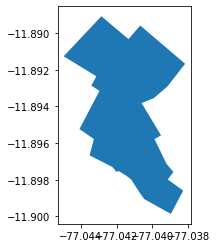

In [174]:
polygon.plot()

In [178]:
polygon.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [181]:
manzanas_carabayllo.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [182]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

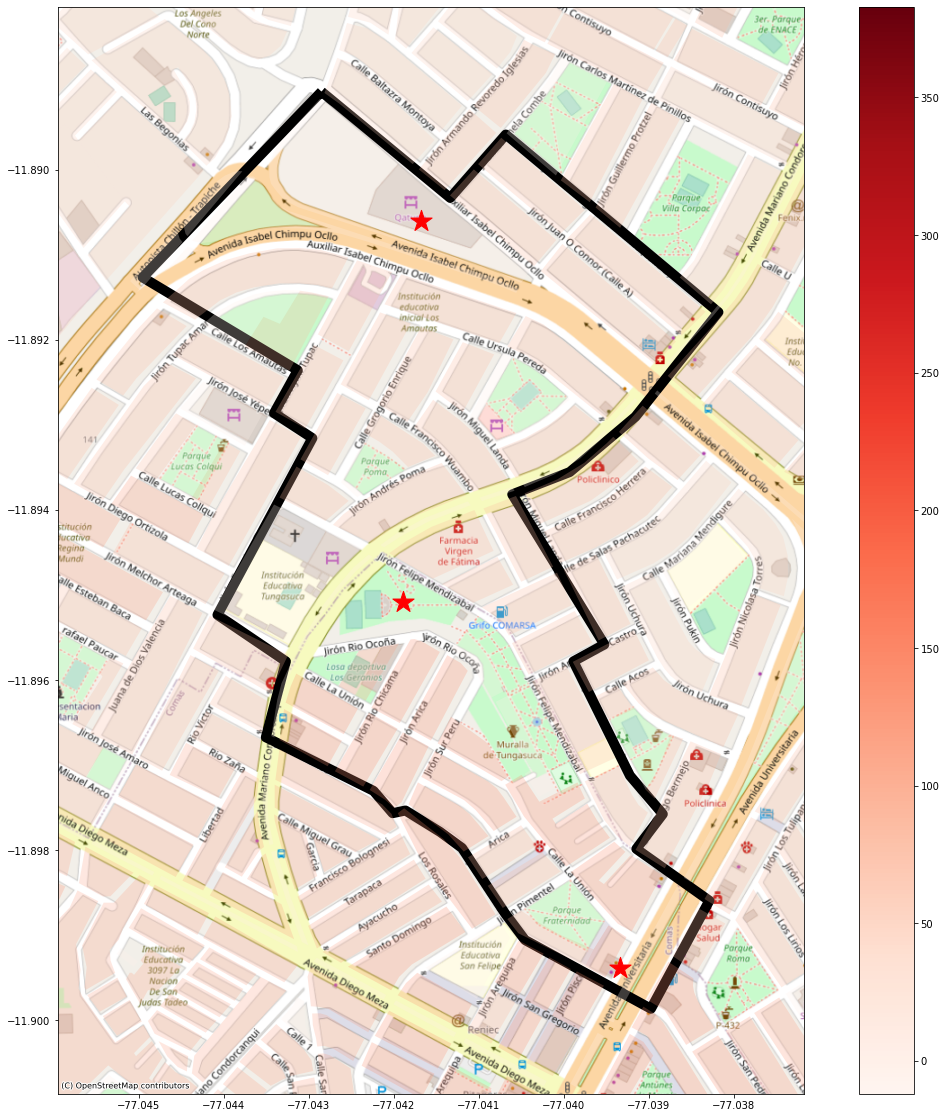

In [192]:
ax = polygon.plot(facecolor='none', linewidth=10, figsize=(20,20))
manzanas_lima.plot('POB16', cmap='Reds', alpha=0.25, edgecolor='none', legend=True, ax=ax)
gdf.iloc[1:].plot(color='r', markersize=500, marker='*', ax=ax)

pad = 0.001
minx, miny, maxx, maxy = polygon.total_bounds
ax.set_xlim(minx-pad, maxx+pad)
ax.set_ylim(miny-pad, maxy+pad)

cx.add_basemap(ax, crs=polygon.crs.to_string(), source=cx.providers.OpenStreetMap.Mapnik)

In [189]:
polygon.crs.to_string()

'EPSG:4326'